In [8]:
import joblib
import pandas as pd
import lightgbm as lgb

model = joblib.load("model.pkl")

In [9]:
data = pd.read_parquet("data/dataset.parquet")
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)
# Convert the data into LightGBM's format
train_dataset = lgb.Dataset(train_data.drop('utility', axis=1), label=train_data['utility'])
test_dataset = lgb.Dataset(test_data.drop('utility', axis=1), label=test_data['utility'])

In [23]:
data.head()

,roll,x,y,light_turn,utility,light_score,dark_score,light_left,dark_left,game0,...,game10,game11,game12,game13,game14,game15,game16,game17,game18,game19
0,2,2,4,False,2.586376,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0
1,2,2,3,False,0.982283,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0
2,3,2,4,False,3.878781,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2,3,False,4.249838,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0
4,4,2,4,False,5.577292,0,0,6,6,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
predictions = model.predict(test_data.drop('utility', axis=1))
pred_test = pd.DataFrame({"pred": predictions, "test": test_data['utility']})

In [20]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
print(pred_test)

              pred       test
22        0.446772   0.453029
28        0.903483   0.958174
30       10.480234  10.467832
40        4.370141   4.296094
41        2.457382   2.755321
43       -0.572205  -0.669505
58        3.414168   3.202563
59       -0.585418  -0.332214
62        1.606448   1.456368
72        2.836559   3.095263
76        0.734611   0.496078
78       -0.022544   0.013919
80        7.871926   8.138896
84       -7.369128  -7.586917
90        3.412382   3.604860
91       -1.757232  -1.806895
93       -0.932198  -1.103836
107       2.288162   2.470298
115       2.581827   2.620811
117       2.223225   2.663089
120       1.287615   1.593824
127      -6.251120  -6.054802
134      -3.152669  -3.437130
139       4.020265   4.306091
145       5.246582   5.744397
150      -3.019323  -3.109610
153      -1.752707  -1.547997
162       5.010044   5.148406
166      13.343326  14.365061
174      -7.990699  -8.045635
183       1.853825   2.604242
189       9.827863   9.841471
207       

array([[<AxesSubplot: title={'center': 'pred'}>,
        <AxesSubplot: title={'center': 'test'}>]], dtype=object)

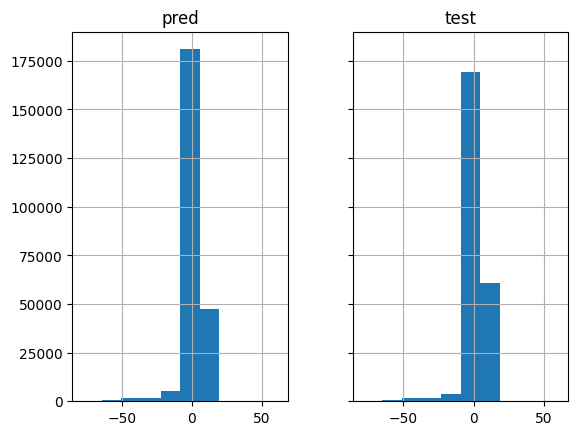

In [22]:
pred_test.hist(sharey=True)

In [2]:
model